Do Rooms that Mention the Word 'View' in their Description Cost more?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

FilePathRoot = "C:\\Users\\USBennetDa2\\OneDrive - NESTLE\\Udacity Data Science Nanodegree\\Project 1"

In [48]:
ListingsCleaned = pd.read_csv(FilePathRoot + "\\ListingsCleaned.csv")
CalendarCleaned = pd.read_csv(FilePathRoot + "\\CalendarCleaned.csv")
CalendarCleaned["id"] = CalendarCleaned["listing_id"]

ListingsCleaned.columns

Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'month

In [84]:
# What is the average price per night for each rental?
ListingPrice = CalendarCleaned.groupby("id").mean().drop(["listing_id", "available"], axis = 1)
#print(ListingPrice.shape)
ListingPrice.dropna(subset = ["price"], inplace = True) #There are 95 out of 3818 listings without a price.
#print(ListingPrice.shape)
# Simplify the dataframe to only include the relevant columns
ListingView = ListingsCleaned[["id", "description", "bedrooms"]] #There are 5 out of 3818 listings without number of bedrooms.
#print(ListingView.shape)
ListingView.dropna(subset = ["bedrooms"], inplace = True)
#print(ListingView.shape)


# Check for NULL values within ListingsView and ListingPrice
#print(ListingView.isna().sum()) #square_feet has about 100 NULL values
#print(ListingPrice.isna().sum()) # price has about 100 NULL values.
# Because the null values represent less than 200 out of ~3,800 (~5%) we can drop them.

# Join the dataframes together
joined = pd.merge(ListingView, ListingPrice, on = "id")
# Check if the description mentions the word "view" regardless of case.
joined["View"] = joined["description"].str.contains("view", case = False)
joined.head()


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,id,description,bedrooms,price,View
0,241032,Make your self at home in this charming one-be...,1.0,85.000000,False
1,953595,Chemically sensitive? We've removed the irrita...,1.0,170.931271,False
2,3308979,New modern house built in 2013. Spectacular s...,5.0,1301.818182,True
3,7421966,A charming apartment that sits atop Queen Anne...,0.0,100.000000,False
4,278830,Cozy family craftman house in beautiful neighb...,3.0,462.739726,True


In [106]:
#What is the average price with an without a view for options with the same number of rooms?
meanprices = joined.drop(["id", "description"], axis = 1).groupby(["bedrooms", "View"]).mean()
#meanprices["testColumn"] = meanprices.index(0)
MeanPricesView = meanprices.query("View == True"); print(MeanPricesView)
MeanPricesNoView = meanprices.query("View == False")

                    price
bedrooms View            
0.0      True  108.626955
1.0      True  119.376984
2.0      True  215.558452
3.0      True  320.969721
4.0      True  328.402273
5.0      True  558.382744
6.0      True  652.479339
7.0      True  557.754839


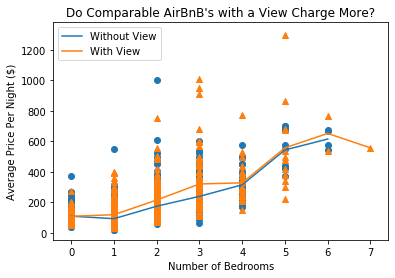

In [109]:
WithView = joined.query("View == True")
NoView = joined.query("View == False")
plt.scatter(NoView["bedrooms"], NoView["price"], marker = "o");
plt.scatter(WithView["bedrooms"], WithView["price"], marker = "^");

plt.plot(MeanPricesNoView.index.get_level_values('bedrooms').values, MeanPricesNoView["price"])
plt.plot(MeanPricesView.index.get_level_values('bedrooms').values, MeanPricesView["price"])

plt.legend(["Without View", "With View"])
plt.ylabel('Average Price Per Night ($)');
plt.xlabel('Number of Bedrooms');
plt.title("Do Comparable AirBnB's with a View Charge More?");

In [55]:
print(joined.isna().sum())
print(joined.shape)

id                0
description       0
square_feet    3721
price            95
View              0
dtype: int64
(3818, 5)
